In [19]:
from caricatore_immagini import ImageLoader

In [20]:
# Indirizzi file e cartelle pulite 
train_dir = "images/FER2013Train"
val_dir = "images/FER2013Valid"
test_dir = "images/FER2013Test"

train_csv = "data/FER2013Train/label_train.csv"
val_csv = "data/FER2013Valid/label_valid.csv"
test_csv = "data/FER2013Test/label_test.csv"

In [21]:
train_set = ImageLoader(train_dir, train_csv)
X_train , y_train = train_set.load_data()

test_set = ImageLoader(test_dir , test_csv)
X_test , y_test = test_set.load_data()

val_set = ImageLoader(val_dir , val_csv)
X_val , y_val = val_set.load_data()

In [12]:
# Cella per caricare il modello 
import tensorflow as tf

model_path = 'modello_pesi_alessio.keras'  
model = tf.keras.models.load_model(model_path)
model_del= tf.keras.models.load_model('modello_della_rocca.keras')

In [22]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303,485 (4.97 MB)

 Trainable params: 434,473 (1.66 MB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 868,948 (3.31 MB)

In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss, test_acc = model_del.evaluate(X_test, y_test)

print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6978 - loss: 1.2548
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.6184 - loss: 1.4738
Test accuracy: 0.6136105060577393
Test loss: 1.4796252250671387


   accuracy       loss  val_accuracy  val_loss
0  0.527824  12.341568      0.508684  1.684303
1  0.562239  11.922951      0.612325  1.446338
2  0.575632  11.687998      0.599440  1.593718
3  0.592365  11.477300      0.641176  1.364911
4  0.596232  11.359305      0.648740  1.394989


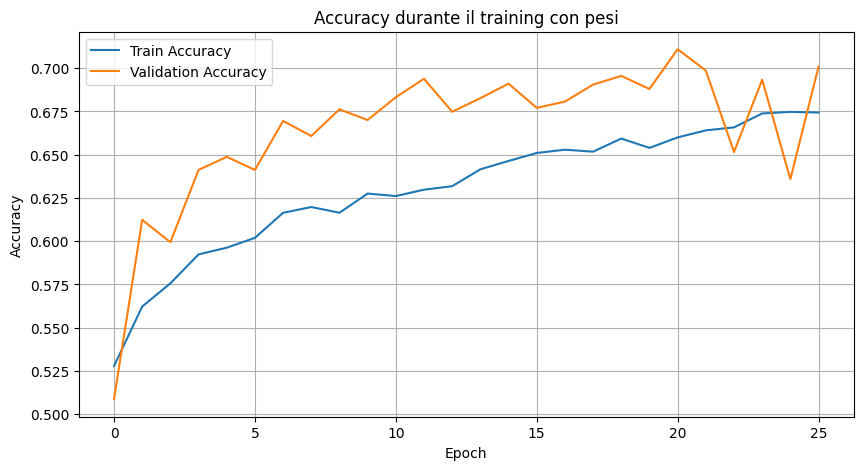

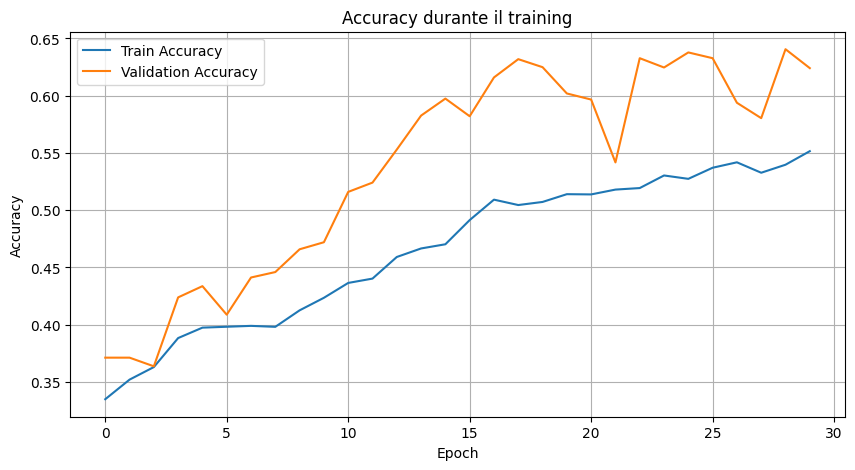

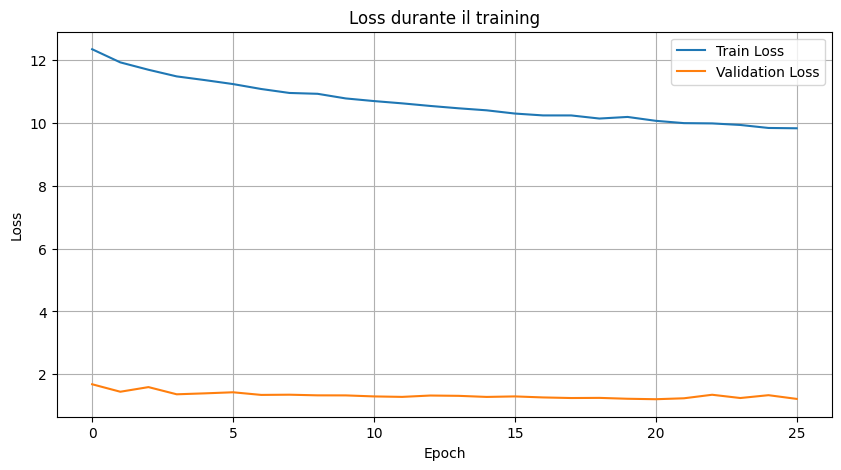

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento del file CSV
file_path = 'modello_pesi.csv'  # Sostituisci con il percorso reale del file CSV
df = pd.read_csv(file_path)
df_del = pd.read_csv('modello_della_rocca.csv')

# Stampa dei primi 5 record per verificare la struttura
print(df.head())

# Supponendo che il CSV contenga le colonne: 'epoch', 'accuracy', 'val_accuracy', 'loss', 'val_loss'

# Creazione del grafico dell'Accuracy
plt.figure(figsize=(10, 5))
plt.plot(df['accuracy'], label='Train Accuracy')
plt.plot(df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy durante il training con pesi')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_del['accuracy'], label='Train Accuracy')
plt.plot(df_del['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy durante il training')
plt.legend()
plt.grid(True)
plt.show()


# Creazione del grafico del Loss
plt.figure(figsize=(10, 5))
plt.plot(df['loss'], label='Train Loss')
plt.plot(df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss durante il training')
plt.legend()
plt.grid(True)
plt.show()

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


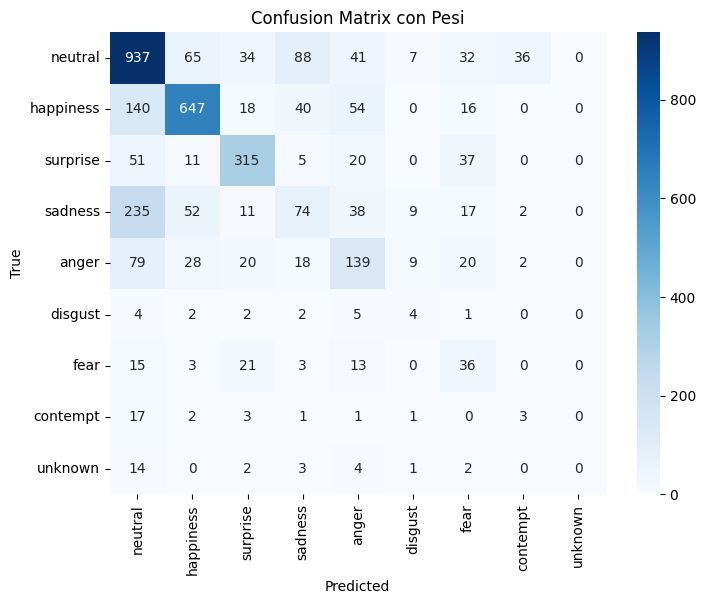

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Supponiamo che tu abbia i dati di test (x_test) e le etichette vere (y_test)
# Esegui le predizioni sul set di test
y_pred = model_del.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Assicurati che y_test sia codificato correttamente se non lo è già (ad esempio se le etichette sono in forma categoriale)
if len(y_test.shape) > 1:  # Se y_test è in formato one-hot encoded
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Creazione della matrice di confusione
cm = confusion_matrix(y_test_classes, y_pred_classes)
emotion_columns = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt', 'unknown']
# Visualizzazione della matrice di confusione usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_columns, yticklabels=emotion_columns)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix con Pesi')
plt.show()

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


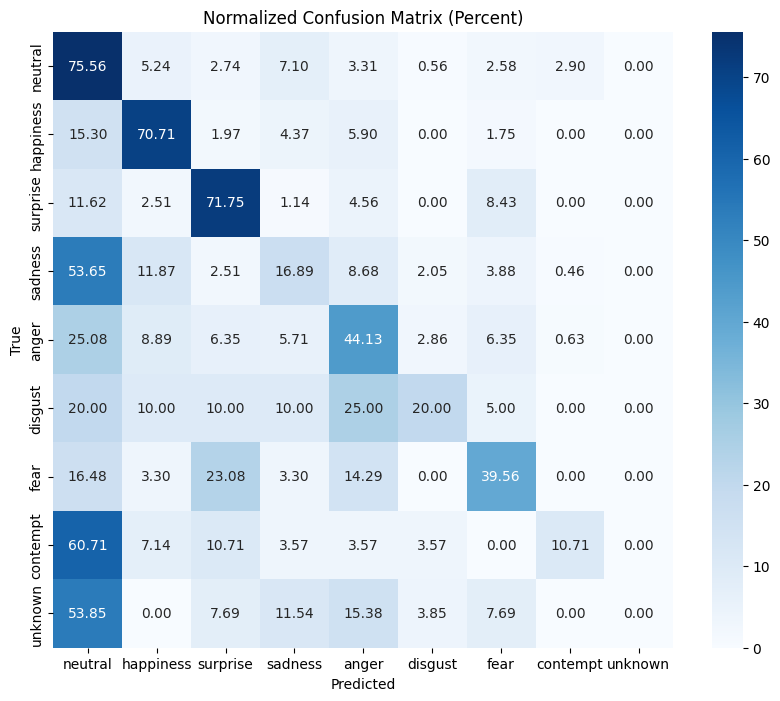

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Supponiamo che tu abbia i dati di test (X_test) e le etichette vere (y_test)
# Esegui le predizioni sul set di test
y_pred = model_del.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Assicurati che y_test sia codificato correttamente se non lo è già (ad esempio se le etichette sono in forma categoriale)
if len(y_test.shape) > 1:  # Se y_test è in formato one-hot encoded
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Creazione della matrice di confusione
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Normalizza la matrice di confusione per riga (percentuale per ogni classe vera)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Definisci le etichette delle emozioni
emotion_columns = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt', 'unknown']

# Visualizzazione della matrice di confusione normalizzata usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=emotion_columns, yticklabels=emotion_columns)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix (Percent)')
plt.show()

